In [3]:
import keras
from keras.applications import MobileNetV2
from keras import models
from keras import layers
from keras import optimizers
from keras import backend as K
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from IPython import get_ipython
import numpy as np

get_ipython().run_line_magic('matplotlib', 'inline')


train_path = 'Data\Train'
valid_path = 'Data\Valid'
test_path = 'Data\Test'

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=4, shuffle=False)

Found 1500 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [4]:
mobile = keras.applications.mobilenet_v2.MobileNetV2()

mobile.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [5]:
for layer in mobile.layers[:-150]:
    layer.trainable = False

for layer in mobile.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000017568B83780> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000017568B83E10> False
<keras.layers.convolutional.Conv2D object at 0x0000017568B839E8> False
<keras.layers.normalization.BatchNormalization object at 0x0000017568B83D68> False
<keras.layers.advanced_activations.ReLU object at 0x0000017568B83A20> False
<keras.layers.convolutional.DepthwiseConv2D object at 0x0000017569AF9A90> False
<keras.layers.normalization.BatchNormalization object at 0x0000017569A545C0> False
<keras.layers.advanced_activations.ReLU object at 0x0000017569B256A0> True
<keras.layers.convolutional.Conv2D object at 0x0000017569B7BE10> True
<keras.layers.normalization.BatchNormalization object at 0x0000017569BBA5F8> True
<keras.layers.convolutional.Conv2D object at 0x0000017569C50C18> True
<keras.layers.normalization.BatchNormalization object at 0x0000017569D02240> True
<keras.layers.advanced_activations.ReLU object at 0x0000017569D3AF28> True
<k

In [6]:
x=mobile.layers[-6].output
x=Flatten()(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [7]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit_generator(train_batches, steps_per_epoch=18,
                    validation_data=valid_batches, validation_steps=5, epochs=100, verbose=2)

Epoch 1/100
 - 385s - loss: 2.6852 - acc: 0.4000 - val_loss: 3.1521 - val_acc: 0.4000
Epoch 2/100
 - 331s - loss: 1.3580 - acc: 0.6944 - val_loss: 1.7015 - val_acc: 0.6200
Epoch 3/100
 - 322s - loss: 0.7787 - acc: 0.8278 - val_loss: 1.6419 - val_acc: 0.6400
Epoch 4/100
 - 324s - loss: 0.8170 - acc: 0.8167 - val_loss: 1.5588 - val_acc: 0.6000
Epoch 5/100
 - 327s - loss: 0.8689 - acc: 0.8056 - val_loss: 1.1614 - val_acc: 0.7400
Epoch 6/100
 - 325s - loss: 0.5869 - acc: 0.8556 - val_loss: 0.5125 - val_acc: 0.8600
Epoch 7/100
 - 326s - loss: 0.7577 - acc: 0.8222 - val_loss: 0.2372 - val_acc: 0.9400
Epoch 8/100
 - 322s - loss: 0.6209 - acc: 0.8500 - val_loss: 0.3062 - val_acc: 0.8600
Epoch 9/100
 - 315s - loss: 0.3214 - acc: 0.9389 - val_loss: 0.4577 - val_acc: 0.9200
Epoch 10/100
 - 318s - loss: 0.0299 - acc: 0.9889 - val_loss: 0.1087 - val_acc: 0.9800
Epoch 11/100
 - 331s - loss: 0.0257 - acc: 0.9889 - val_loss: 0.0537 - val_acc: 0.9800
Epoch 12/100
 - 331s - loss: 0.0427 - acc: 0.9833 - 

Epoch 94/100
 - 343s - loss: 3.8712e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 95/100
 - 346s - loss: 8.2670e-04 - acc: 1.0000 - val_loss: 1.3113e-04 - val_acc: 1.0000
Epoch 96/100
 - 346s - loss: 2.2521e-04 - acc: 1.0000 - val_loss: 0.0254 - val_acc: 0.9800
Epoch 97/100
 - 340s - loss: 3.0853e-04 - acc: 1.0000 - val_loss: 0.0212 - val_acc: 0.9800
Epoch 98/100
 - 342s - loss: 2.3901e-04 - acc: 1.0000 - val_loss: 3.6353e-04 - val_acc: 1.0000
Epoch 99/100
 - 343s - loss: 4.6875e-04 - acc: 1.0000 - val_loss: 3.8647e-04 - val_acc: 1.0000
Epoch 100/100
 - 346s - loss: 1.2504e-04 - acc: 1.0000 - val_loss: 0.1212 - val_acc: 0.9800


In [9]:
model.save('PiVisionFinal.h5')

In [12]:
model.save_weights('PiVisionFinal_weights.h5')

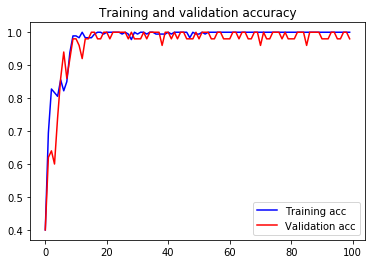

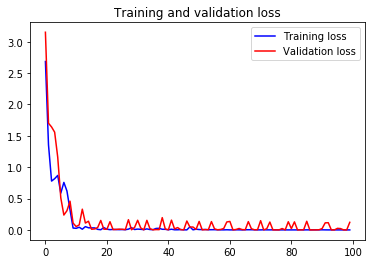

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [17]:
test_labels=test_batches.class_indices
print (test_labels)

{'Analyn': 0, 'Franz Clint': 1, 'Genie': 2, 'Joevert': 3, 'John Arjay': 4, 'Jovit': 5, 'Mardon': 6, 'Nino Vincent': 7, 'Ruel James': 8, 'Sherwin': 9}


In [20]:
test_labels = test_batches.classes
test_labels
test_batches.class_indices

{'Analyn': 0,
 'Franz Clint': 1,
 'Genie': 2,
 'Joevert': 3,
 'John Arjay': 4,
 'Jovit': 5,
 'Mardon': 6,
 'Nino Vincent': 7,
 'Ruel James': 8,
 'Sherwin': 9}

In [26]:
acc = model.predict_generator(test_batches, steps=5, verbose=0)

In [32]:
from keras.models import load_model
model = load_model('PiVisionFinal.h5')

In [33]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
from keras.preprocessing import image

test_image= image.load_img('1.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)  

In [44]:
print (result)

[[6.4043561e-05 4.0387777e-06 5.7413094e-05 4.3322724e-01 4.8211630e-05
  3.2328039e-03 5.4211664e-04 5.6212872e-01 6.7689107e-04 1.8414050e-05]]


In [51]:
np.savetxt('test.txt', test_labels, delimiter=',') 

In [63]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

In [64]:
from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

INFO:tensorflow:Froze 2755 variables.
INFO:tensorflow:Converted 2755 variables to const ops.


In [65]:
tf.train.write_graph(frozen_graph, "some_directory", "my_model.pb", as_text=False)

'some_directory\\my_model.pb'

In [66]:
from keras import backend as K
import tensorflow as tf
print(model.output.op.name)
saver = tf.train.Saver()
saver.save(K.get_session(), '/tmp/keras_model.ckpt')


dense_1_2/Softmax


'/tmp/keras_model.ckpt'

In [ ]:
np.savetxt('labels.pbtxt', test_labels, delimiter=',')